In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Title:
Exploration of Game results for Top 500 Players from 2017-2019 by several factors.

# Introduction:
A fantastic globe game competition that took place from 2017 to 2019 is detailed in the online data of the game outcomes. Various pieces of information, including ranking and score, are recorded for people to compare and contrast. For this project, our group plan to identify the factors that would determine a player's victory and make predictions about future players. For the dataset that will be used to answer the question, it include all the imformation that we need, such as the data, names, score, and ranking for almost thousands of rounds.

# Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R   

Clean and wrangle your data into a tidy format    

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.   

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.  

In [8]:
#read table here
read_csv("data/atp2017-2019.csv")

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


In [13]:
#clean the data
clean_game_data <- read_csv("data/atp2017-2019.csv") |>
    mutate(player1_age = winner_age, player2_age = loser_age, player1_rank = winner_rank, player2_rank = loser_rank, smaller_ranking_player_wins = (player1_rank < player2_rank)) |>
    select(player1_age, player2_age, player1_rank, player2_rank, smaller_ranking_player_wins)

game_split <- initial_split(clean_game_data, prop = 0.75, strata = smaller_ranking_player_wins)
game_train <- training(game_split)
game_test <- testing(game_split)

game_train

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


player1_age,player2_age,player1_rank,player2_rank,smaller_ranking_player_wins
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
33.70568,19.86858,239,31,FALSE
33.70568,25.92471,239,77,FALSE
31.88227,23.67967,40,35,FALSE
26.40383,23.97810,185,14,FALSE
33.70568,22.72416,239,146,FALSE
31.63039,26.94319,240,234,FALSE
19.33470,31.63039,131,56,FALSE
26.40383,20.51472,185,102,FALSE
26.37098,21.17454,63,49,FALSE


In [14]:
#make a table 

player_count <- game_train |>
    group_by(smaller_ranking_player_wins) |>
        summarize(count = n())

player_count

winner_age <- game_train |>
    filter(smaller_ranking_player_wins == "TRUE") |>
        group_by(smaller_ranking_player_wins) |>
        summarize(winner_mean_age = mean(player1_age), loser_mean_age = mean(player2_age))

winner_age

winner_rank <- game_train |>
    filter(smaller_ranking_player_wins == "TRUE") |>
    group_by(smaller_ranking_player_wins) |>
        summarize(winner_mean_rank = mean(player1_rank), loser_mean_rank = mean(player2_rank))

winner_rank

smaller_ranking_player_wins,count
<lgl>,<int>
FALSE,1869
TRUE,3270
NA,10


smaller_ranking_player_wins,winner_mean_age,loser_mean_age
<lgl>,<dbl>,<dbl>
TRUE,27.97214,27.21876


smaller_ranking_player_wins,winner_mean_rank,loser_mean_rank
<lgl>,<dbl>,<dbl>
TRUE,36.9422,108.1853


smaller_ranking_player_wins,player,mean_age
<lgl>,<chr>,<dbl>
TRUE,winner_mean_age,27.97214
TRUE,loser_mean_age,27.21876


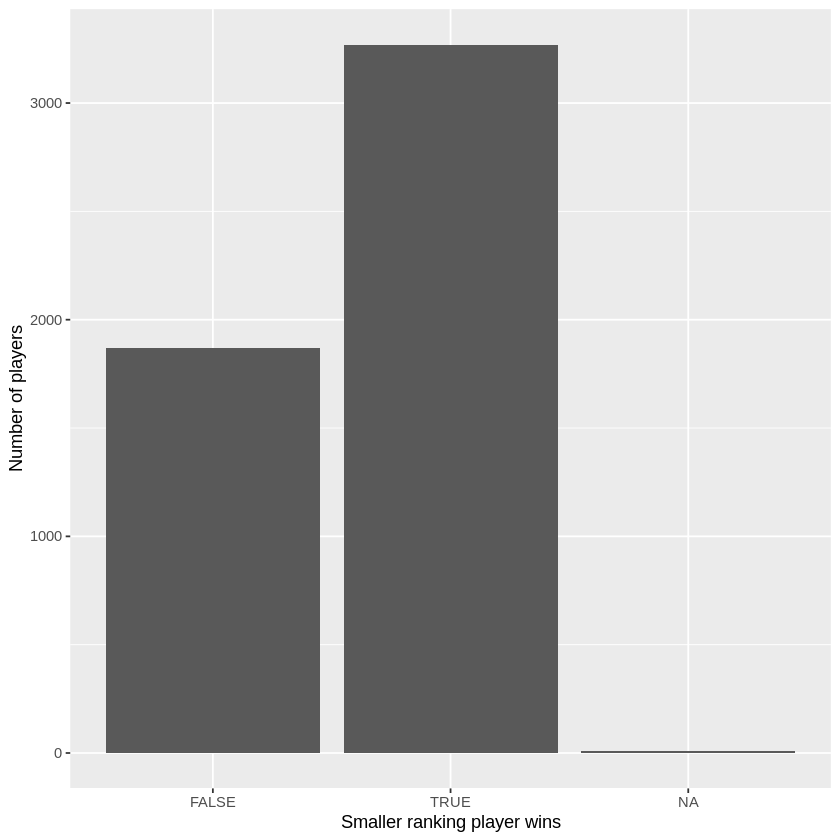

smaller_ranking_player_wins,player,mean_rank
<lgl>,<chr>,<dbl>
TRUE,winner_mean_rank,36.9422
TRUE,loser_mean_rank,108.1853


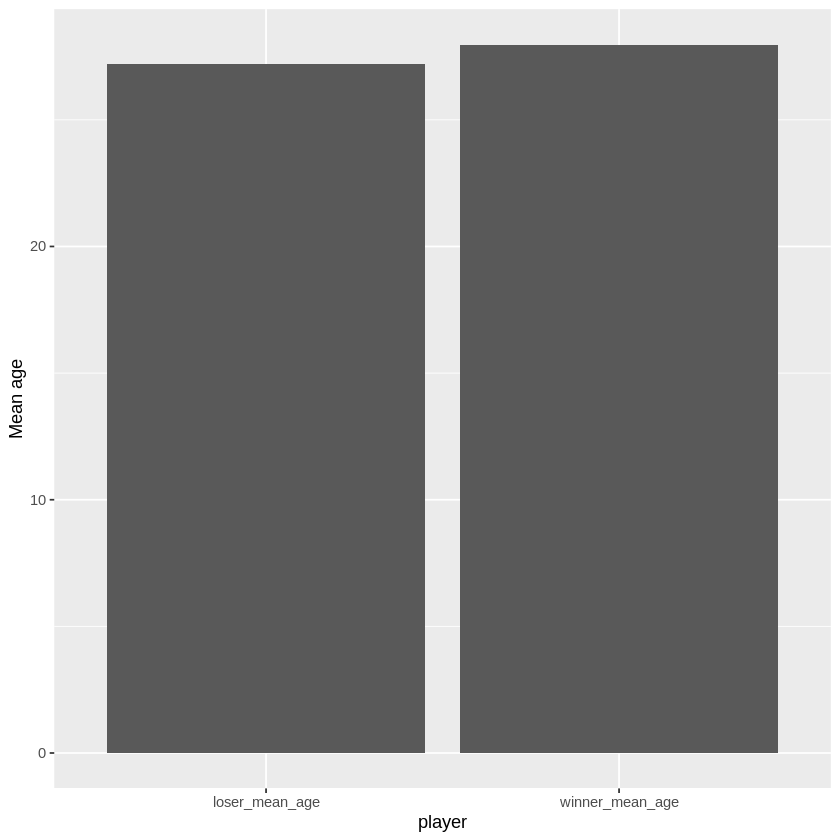

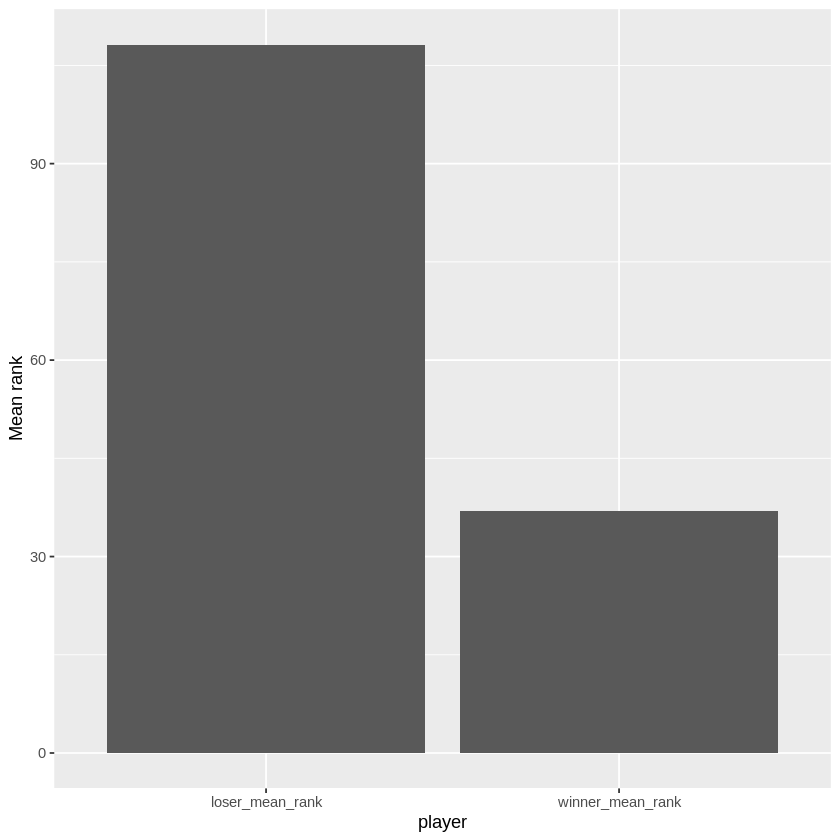

In [15]:
#make a graph

plot1 <- player_count |>
    ggplot(aes(x = smaller_ranking_player_wins, y = count)) +
    geom_bar(stat = "identity") +
    labs(x = "Smaller ranking player wins", y = "Number of players")
plot1

mean_age <- pivot_longer(winner_age,
  cols = winner_mean_age:loser_mean_age,
  names_to = "player",
  values_to = "mean_age"
)

mean_age

plot2 <- mean_age |>
    ggplot(aes(x = player, y = mean_age)) +
    geom_bar(stat = "identity") +
    labs(y = "Mean age")

plot2

mean_rank <- pivot_longer(winner_rank,
  cols = winner_mean_rank:loser_mean_rank,
  names_to = "player",
  values_to = "mean_rank"
)

mean_rank

plot3 <- mean_rank |>
    ggplot(aes(x = player, y = mean_rank)) +
    geom_bar(stat = "identity") +
    labs(y = "Mean rank")

plot3

# Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use

We intend to use a player's age and ranking to predict a win or loss between any two players, as these are the two variables that we believe have the greatest impact on the outcome of a win or loss. Other variables such as tour id and player id are just names and have no impact on win/loss, as well as tour level, tour date and match num, which we will exclude. We may use what we learned in the classification chapter to give the magnitude of prediction accuracy between different k-values (k-nearest neighbor classification) and use the k-value with the highest accuracy for our prediction.

# Expected outcomes and significance：
What do you expect to find?

What impact could such findings have?   

What future questions could this lead to?   


1. For our group, We want to find the few factors that have the greatest impact on the game resulte, so that we can compare and contrast the result of our finding, and conclude the key to winning the game.
2. Based on our findings, we probably could make a prediction to future competitions, and give some helpful suggestion to future contestants.
3. Based on our findings, it probably will make future contestants put more attention on those factors, and they may ignore other unimportant factors，which may also lead to their failure though those factor is negligible. 